# ANALYSIS FOR WHETHER DATASET

# TUJUAN ANALISIS: PREDIKSI TEMPERATUR PER JAM KEDEPAN

Memprediksi suhu harian di Indonesia dengan menggunakan CDD dataset from Kaggle dataset.        
(https://www.kaggle.com/datasets/gauravsahani/timeseries-analysis-for-whether-dataset)

# DATA UNDERSTANDING (MEMAHAMI DATA)

## Collecting data

Setelah mencari data kemudian melakukan import data ke dataframe

Setelah mencari data kemudian melakukan import data ke dataframe

In [538]:
import pandas as pd

file_path = 'Whether_Dataset.csv'

df_main = pd.read_csv(file_path)

df_main

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,01-10-2019 00:00,26,1,22.01,101,3.08,6.42,1008.45,0,268.6,0.0,partly-cloudy-night
1,01-10-2019 01:00,25,1,22.06,105,2.94,6.28,1008.24,0,269.1,0.0,partly-cloudy-night
2,01-10-2019 02:00,25,1,22.06,106,2.82,6.08,1007.90,0,269.7,0.0,partly-cloudy-night
3,01-10-2019 03:00,24,1,21.87,106,2.63,5.74,1007.61,0,270.4,0.0,partly-cloudy-night
4,01-10-2019 04:00,23,1,21.53,100,2.39,5.30,1007.51,0,271.3,0.0,partly-cloudy-night
...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32,0,6.13,319,3.77,4.50,1011.58,5,274.5,0.0,clear-day
495,21-10-2019 15:00,32,0,5.74,321,4.08,5.20,1010.65,3,274.7,0.0,clear-day
496,21-10-2019 16:00,32,0,6.05,323,3.94,5.68,1010.31,1,274.9,0.0,clear-day
497,21-10-2019 17:00,31,0,6.85,326,3.61,6.08,1010.73,0,275.7,0.0,clear-day


Melihat Visualisasi data awal, menentukan apakah data terdapat anomali

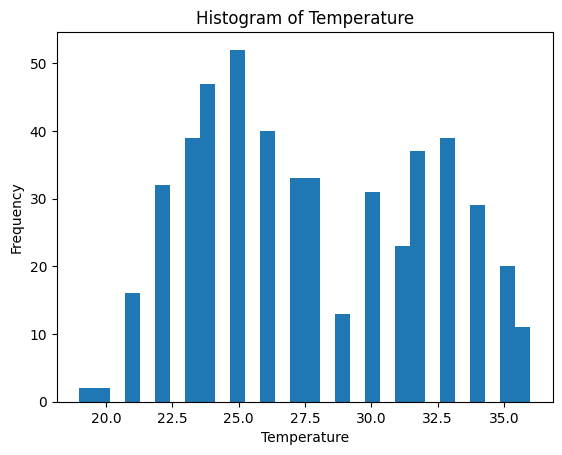

In [539]:
import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv('Whether_Dataset.csv')

df['temperature'].plot(kind='hist', bins=30, title='Histogram of Temperature')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()


Visualisasi Distribusi untuk Fitur Individu

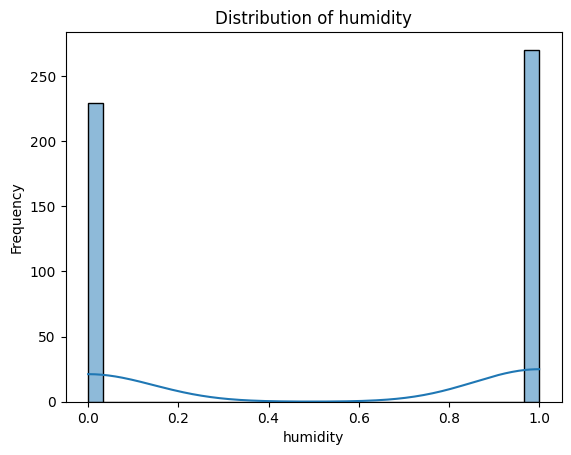

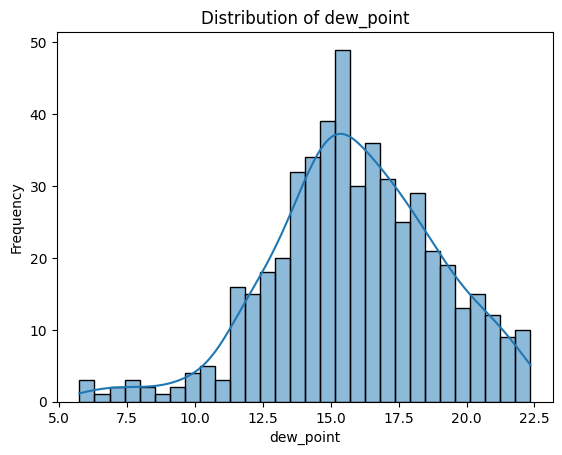

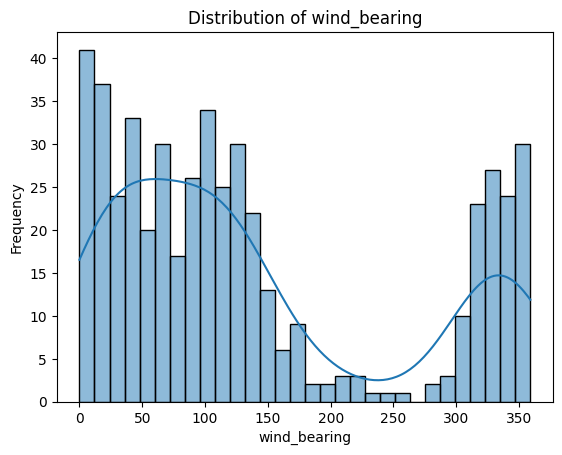

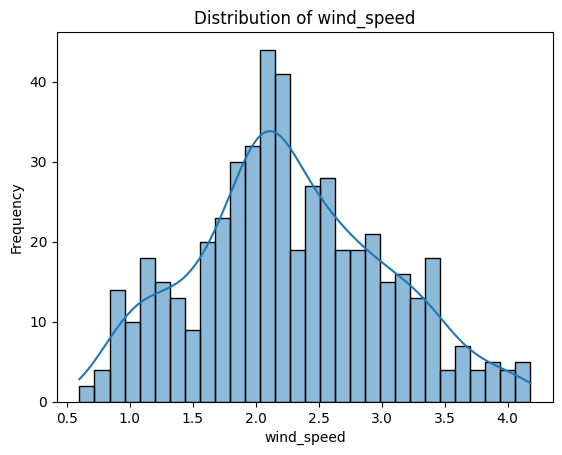

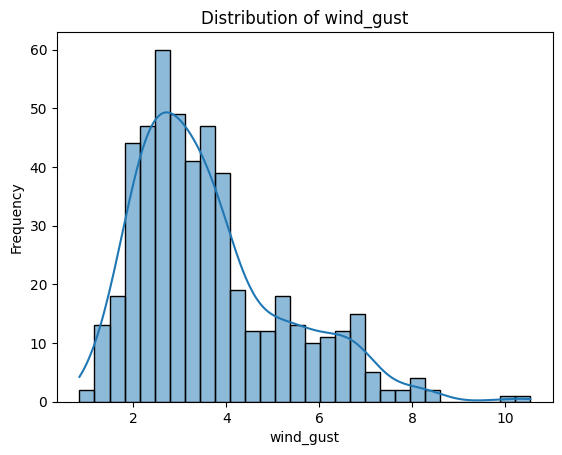

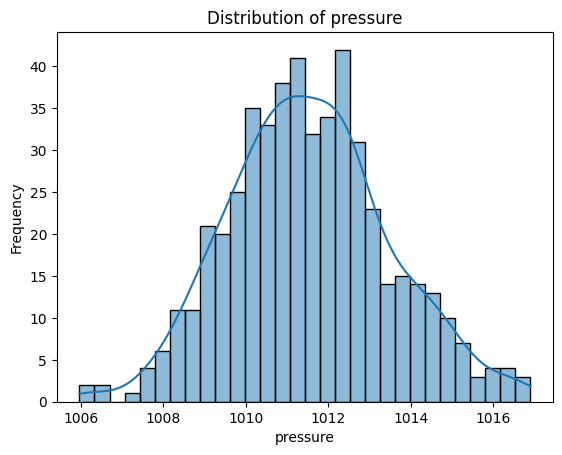

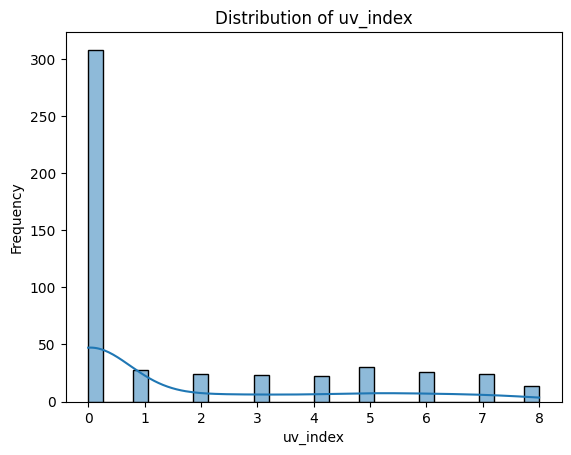

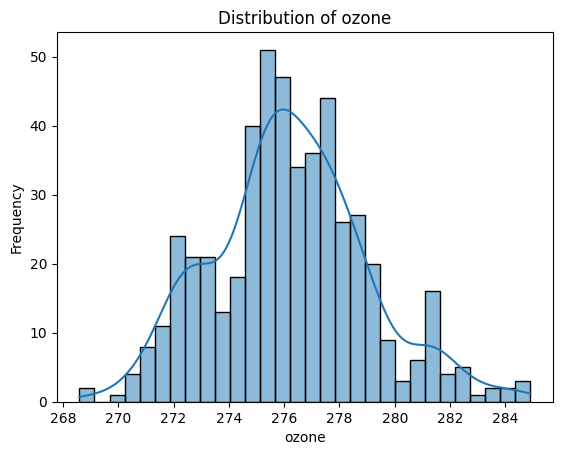

In [540]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

features = ['humidity', 'dew_point', 'wind_bearing', 'wind_speed', 
            'wind_gust', 'pressure', 'uv_index', 'ozone']

for feature in features:
    sns.histplot(df[feature], kde=True, bins=30)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

## Data Overview (Identifikasi Data)

Konsep macam-macam tipe data

Atribut adalah bidang data, yang mewakili karakteristik atau fitur objek data. Hal ini berarti atribut, dimensi, fitur, dan variabel yang sering digunakan secara bergantian dalam literatur.

- Nominal attributes: atribut yang nilainya berupa simbol atau nama yang merepresentasikan kategori atau status tertentu tanpa urutan yang berarti.
- Binary attributes: atribut nominal dengan dua kategori atau status, biasanya 0 dan 1.
- Ordinal attributes: atribut yang nilainya memiliki urutan yang berarti atau ranking, namun selisih antara nilai-nilai tersebut tidak diketahui.
- Numeric attributes: atribut kuantitatif yang diukur dalam nilai integer atau real.

Mengamati secara langsung dari data yang diperoleh dari Climate Data Daily IDN dataset dan mendeskripsikan langsung jumlah kolom, nama kolom, jumlah data, missing values, dan type data dari setiap kolom data tersebut

In [541]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   datetime_local    499 non-null    object 
 1   temperature       499 non-null    int64  
 2   humidity          499 non-null    int64  
 3   dew_point         499 non-null    float64
 4   wind_bearing      499 non-null    int64  
 5   wind_speed        499 non-null    float64
 6   wind_gust         499 non-null    float64
 7   pressure          499 non-null    float64
 8   uv_index          499 non-null    int64  
 9   ozone             499 non-null    float64
 10  precip_intensity  499 non-null    float64
 11  icon              499 non-null    object 
dtypes: float64(6), int64(4), object(2)
memory usage: 46.9+ KB


In [542]:
df_main.describe()

,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity
count,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000
mean,27.797595,0.541082,15.871303,139.523046,2.267114,3.616974,1011.535411,1.641283,276.195792,0.009820
std,4.305725,0.498809,3.065238,118.438353,0.755191,1.608687,1.932765,2.493683,2.788063,0.036247
min,19.000000,0.000000,5.740000,0.000000,0.600000,0.840000,1005.970000,0.000000,268.600000,0.000000
25%,24.000000,0.000000,14.025000,44.000000,1.780000,2.460000,1010.235000,0.000000,274.600000,0.000000
50%,27.000000,1.000000,15.710000,105.000000,2.200000,3.220000,1011.430000,0.000000,276.100000,0.000000
75%,32.000000,1.000000,17.990000,217.500000,2.780000,4.345000,1012.675000,3.000000,277.800000,0.000000
max,36.000000,1.000000,22.350000,359.000000,4.180000,10.540000,1016.900000,8.000000,284.900000,0.420000


Dari hasil kode diatas yang merupakan tabel dari dataset, kita bisa menyimpulkan bahwa data ini memiliki 1000 baris dan 10 kolom

Untuk fitur dari dataset tersebut ada 9 yaitu seperti yang disebutkan diatas: humidity, dew_point, wind_bearing, wind_speed, wind_gust, pressure, uv_index, ozone Sedangkan untuk targetnya adalah temperature.

Penjelasan dari setiap fitur yang ada pada tabel diatas:

- target: "Temperature" dengan tipe data Numerical, adalah prediksi suhu harian dalam mempertimbangkan fitur sebelumnya

Numerical Variable: humidity, dew_point, wind_bearing, wind_speed, wind_gust, pressure, uv_index, ozone, temperature.

In [543]:
import numpy as np

Melihat Visualisasi grafik time series dari temperature harian dari waktu ke waktu.

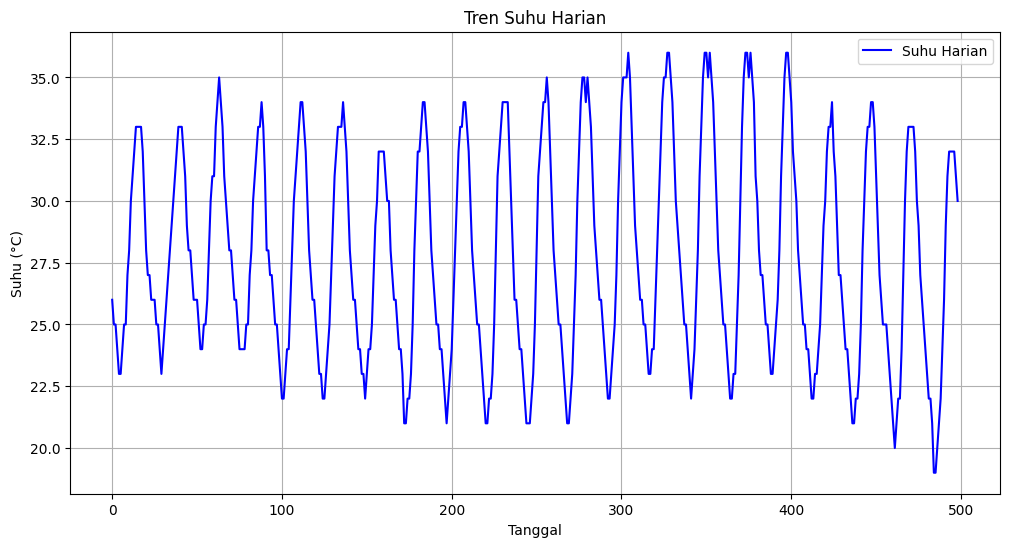

In [544]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(12, 6))
plt.plot(df_main.index, df_main['temperature'], label='Suhu Harian', color='blue')
plt.title('Tren Suhu Harian')
plt.xlabel('Tanggal')
plt.ylabel('Suhu (°C)')
plt.legend()
plt.grid()
plt.show()

Seperti di lihat pada Visualisasi grafik time series di atas temperature naik turun

Visualisasi Korelasi Antar Fitur dan Target

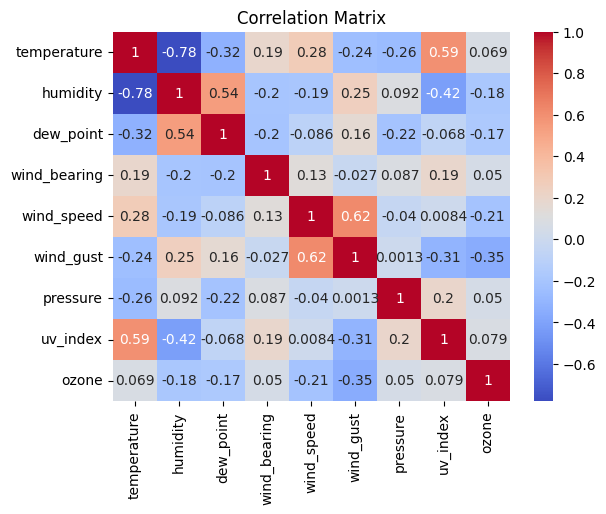

In [545]:
correlation_matrix = df_main[['temperature'] + features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

## Kualitas Data

### Distribusi data

Menggunakan histrogram untuk melihat distribusi fitur

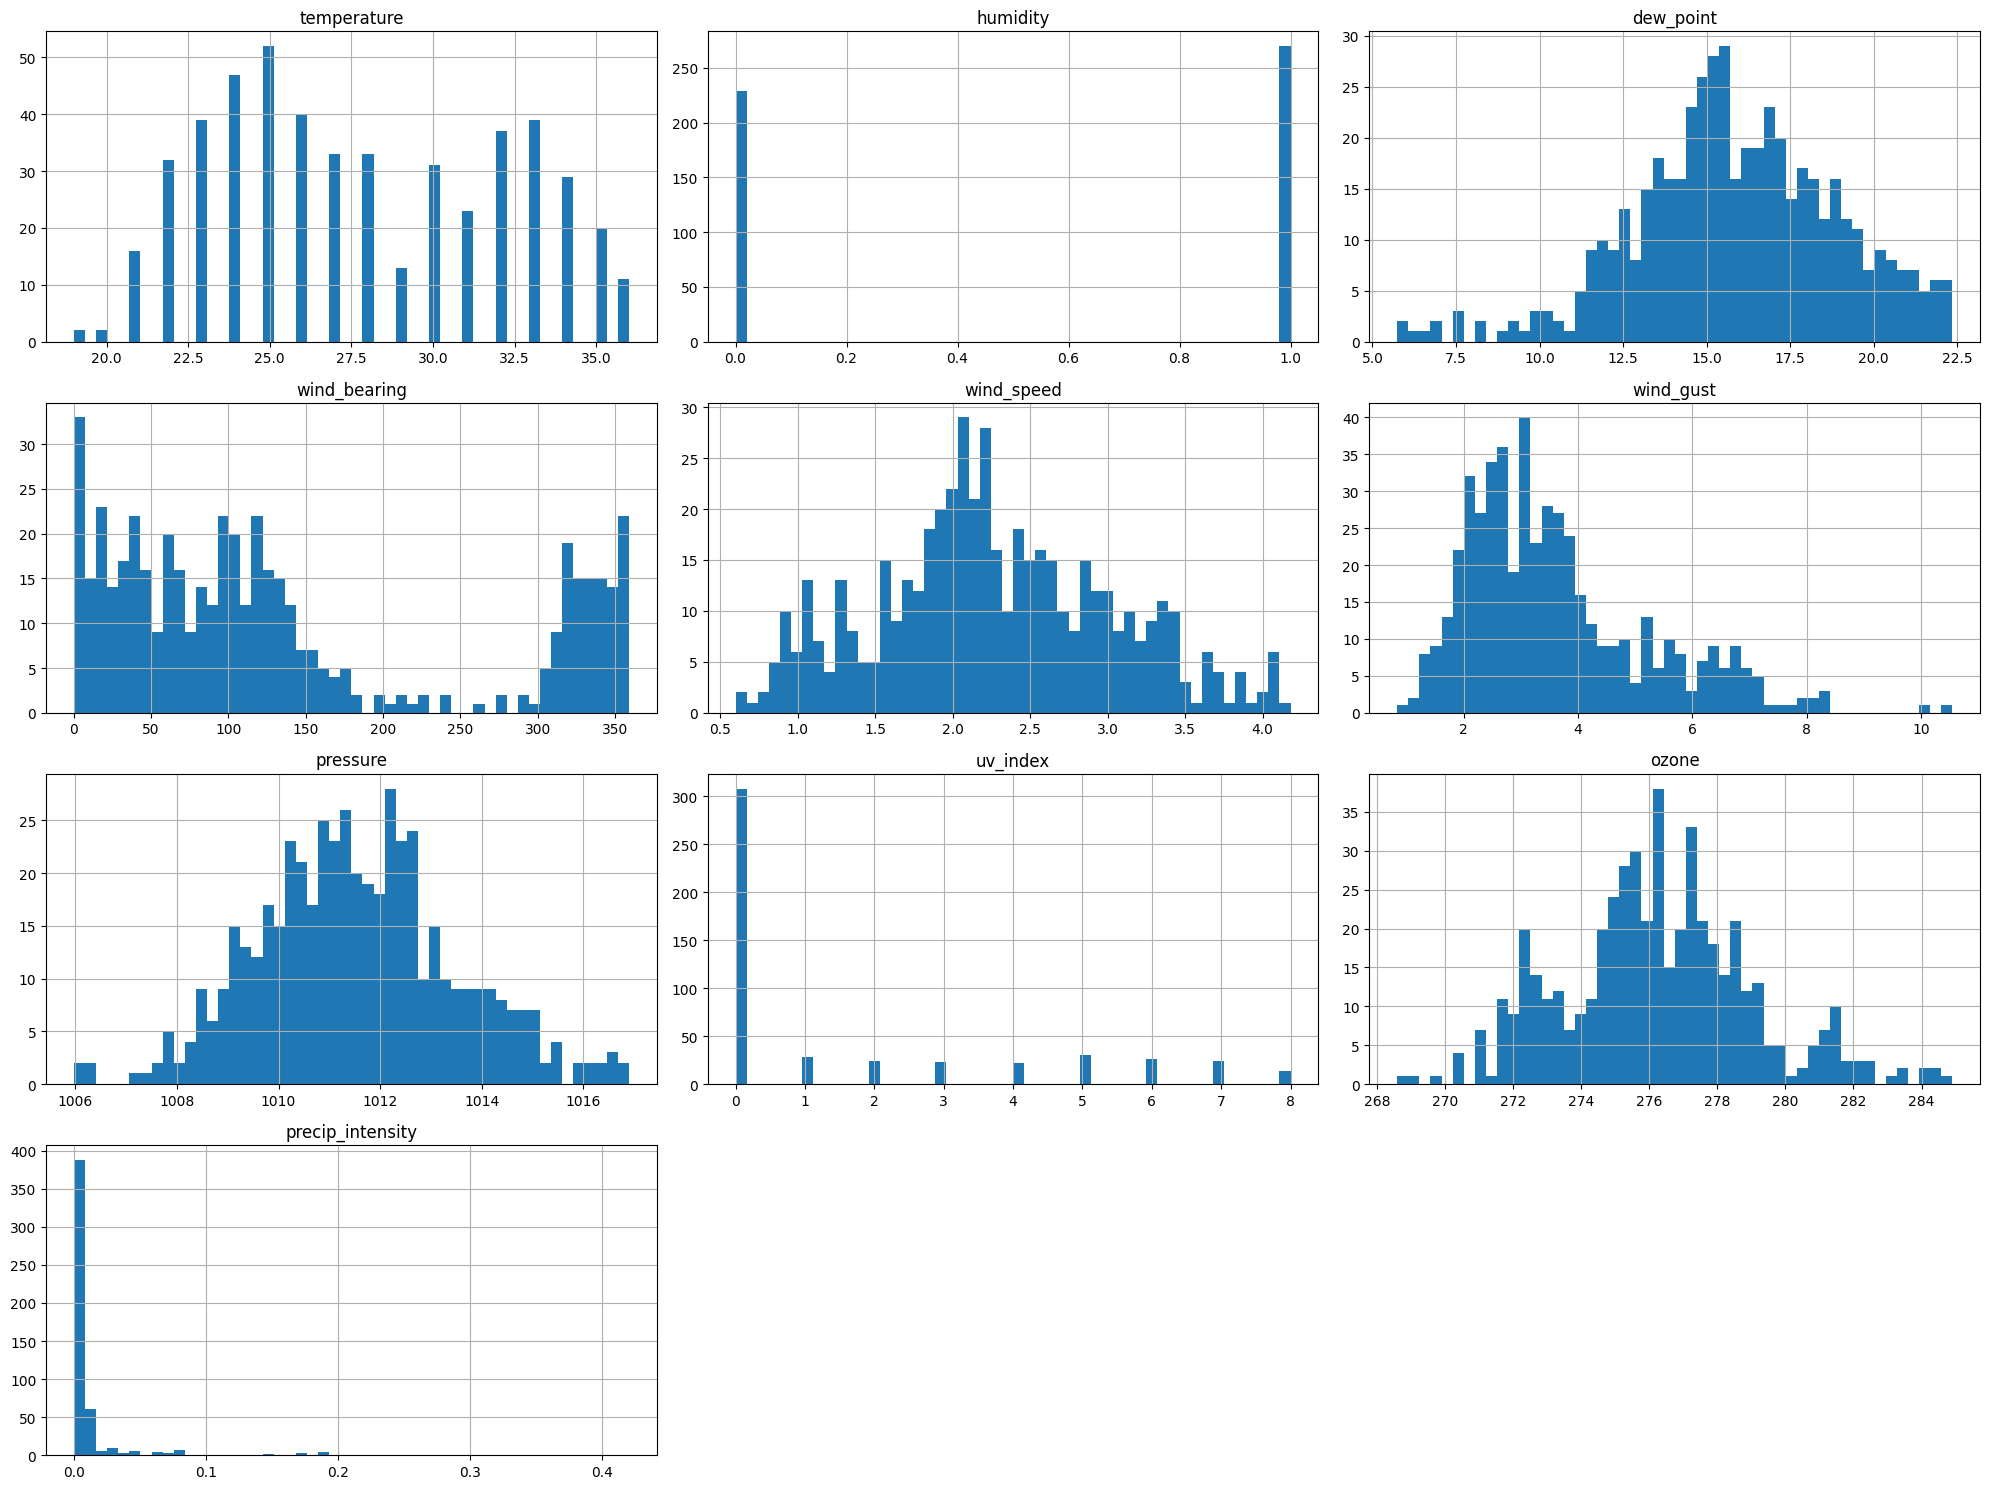

In [546]:
df_main.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

### Missing Value

Mencari missing value apakah ada missing value di data ini

datetime_local      0
temperature         0
humidity            0
dew_point           0
wind_bearing        0
wind_speed          0
wind_gust           0
pressure            0
uv_index            0
ozone               0
precip_intensity    0
icon                0
dtype: int64


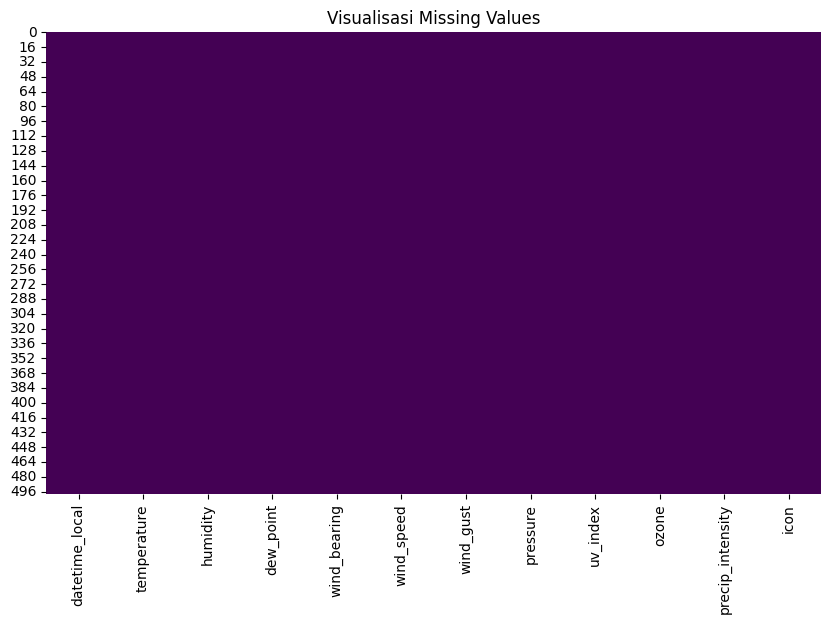

In [547]:
print(df_main.isnull().sum())

plt.figure(figsize=(10, 6))
sns.heatmap(df_main.isnull(), cbar=False, cmap='viridis')
plt.title('Visualisasi Missing Values')
plt.show()

In [548]:
missing_values = df_main.isnull()
missing_values.head(len(missing_values))

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
494,False,False,False,False,False,False,False,False,False,False,False,False
495,False,False,False,False,False,False,False,False,False,False,False,False
496,False,False,False,False,False,False,False,False,False,False,False,False
497,False,False,False,False,False,False,False,False,False,False,False,False


Karena tidak terdapat missing values dalam data tersebut, kita dapat menganggap data telah bersih sehingga tidak perlu dilakukan inputasi missing values. 

### Outliers

Lalu, saya melakukan deteksi outlier, untuk memperbaiki kualitas data.

Menurut referensi yang didapat dari buku "Data Mining : Concept and Technique":

Link:
https://myweb.sabanciuniv.edu/rdehkharghani/files/2016/02/The-Morgan-Kaufmann-Series-in-Data-Management-Systems-Jiawei-Han-Micheline-Kamber-Jian-Pei-Data-Mining-Concepts-and-Techniques-3rd-Edition-Morgan-Kaufmann-2011.pdf

Local Outlier Factor (LOF) adalah metode deteksi outlier yang didasarkan pada kepadatan lokal suatu titik data dalam kaitannya dengan tetangga terdekatnya. Metode ini bertujuan untuk mengidentifikasi outlier lokal dengan membandingkan kepadatan lokal dari suatu titik dengan kepadatan lokal dari tetangga-tetangganya. Berikut adalah komponen utama dan langkah-langkah perhitungan dalam LOF:

#### 1. K-Tetangga Terdekat (K-Nearest Neighbors, K-NN)

- **Jarak K (k-distance)**: Jarak dari titik $ o $ ke tetangga terdekat ke-k.
  $$
  \text{k-distance}(o) = \text{dist}(o, o_k)
  $$
  di mana $ o_k $ adalah tetangga terdekat ke-k dari $ o $.

- **Lingkungan Jarak K (k-distance neighborhood)**: Himpunan titik-titik yang berada dalam jarak K dari $ o $.
  $$
  N_k(o) = \{ o' \mid \text{dist}(o, o') \leq \text{k-distance}(o) \}
  $$

#### 2. Jarak Jangkauan (Reachability Distance)

Jarak jangkauan dari titik $ o' $ ke titik $ o $ didefinisikan sebagai:
$$
\text{reachdist}_k(o', o) = \max(\text{k-distance}(o), \text{dist}(o', o))
$$

#### 3. Kepadatan Jangkauan Lokal (Local Reachability Density)

Kepadatan jangkauan lokal $ lrd_k(o) $ dari titik $ o $ adalah kebalikan dari rata-rata jarak jangkauan dari tetangga terdekatnya:
$$
lrd_k(o) = \frac{|N_k(o)|}{\sum_{o' \in N_k(o)} \text{reachdist}_k(o', o)}
$$

#### 4. Faktor Outlier Lokal (Local Outlier Factor)

Faktor outlier lokal $ LOF_k(o) $ dari titik $ o $ adalah rata-rata dari rasio kepadatan jangkauan lokal $ o $ terhadap kepadatan jangkauan lokal dari tetangga terdekatnya:
$$
LOF_k(o) = \frac{\sum_{o' \in N_k(o)} \frac{lrd_k(o')}{lrd_k(o)}}{|N_k(o)|}
$$

Data outlier sering kali mempengaruhi model data secara umum sehingga pengaruh dari data outlier tersebut. setelah di cek menggunakan LOF terdapat outlier

Proses perhitungan LOF untuk mendeteksi adanya outlier dengan 40 tetangga terdekat menggunakan jarak Euclidean (p=2) dan contamination.

Menampilkan beberapa data yang teridentifikasi sebagai outlier (dengan skor LOF negatif).

Berdasarkan output di atas, terlihat bahwa terdapat 13 data outlier. Disini saya tidak menghapus data outlier saja. Namun disni saya melakukan interpolasi data. Cara kerja interpolasi data menghapus nilai outlier terlebih dahulu kemudian mengisi data dengan rata rata samping kanan kiri yang sudah di hapus. Hasil rata rata tersebut diisi. 

In [549]:
numerical_cols = df_main.select_dtypes(include=['float64', 'int64']).columns.tolist()

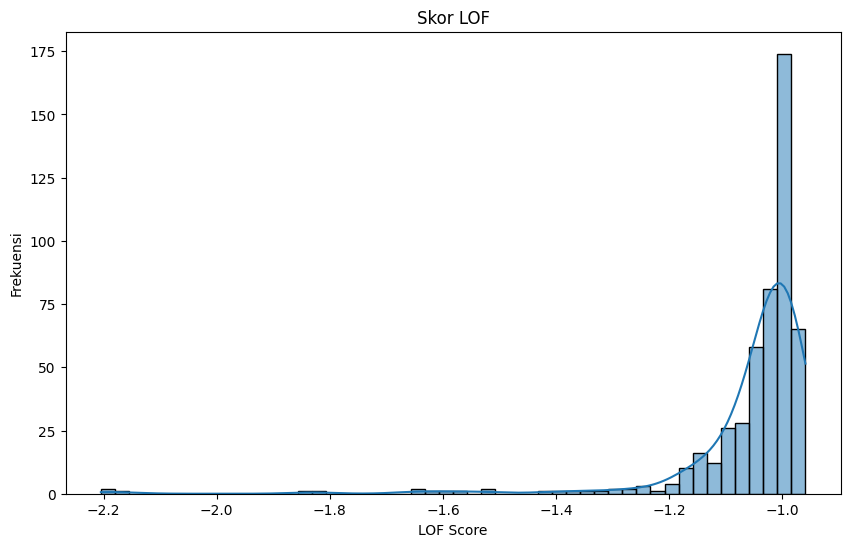

In [550]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

# Model LOF
n_neighbors = 20
lof = LocalOutlierFactor(n_neighbors=n_neighbors, contamination=0.05)

# Menghitung outlier dan skor LOF
y_pred = lof.fit_predict(df_main[numerical_cols])
lof_scores = lof.negative_outlier_factor_

# Menambahkan kolom LOF Score dan Outlier ke DataFrame
df_main['LOF_Score'] = lof_scores
df_main['Outlier'] = y_pred

# Menampilkan data outlier
outliers = df_main[df_main['Outlier'] == -1]


# Visualisasi distribusi skor LOF
plt.figure(figsize=(10, 6))
sns.histplot(df_main['LOF_Score'], bins=50, kde=True)
plt.title('Skor LOF')
plt.xlabel('LOF Score')
plt.ylabel('Frekuensi')
plt.show()


In [551]:
outliers

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon,LOF_Score,Outlier
13,01-10-2019 13:00,32,1,20.52,60,2.03,2.03,1008.35,5,271.6,0.01,partly-cloudy-day,-1.263820,-1
128,06-10-2019 08:00,25,1,18.51,239,0.95,1.04,1012.34,1,277.0,0.00,partly-cloudy-day,-1.649981,-1
129,06-10-2019 09:00,27,1,17.99,223,1.15,1.47,1012.58,2,276.5,0.00,partly-cloudy-day,-1.655098,-1
161,07-10-2019 17:00,31,0,16.33,278,2.83,3.98,1011.24,0,279.6,0.00,partly-cloudy-day,-2.157886,-1
173,08-10-2019 05:00,21,1,13.99,299,1.68,3.02,1010.81,0,277.6,0.00,clear-night,-1.394596,-1
175,08-10-2019 07:00,22,1,16.55,294,1.35,2.58,1012.55,0,275.9,0.00,clear-day,-1.522190,-1
176,08-10-2019 08:00,23,1,17.03,276,1.85,3.02,1013.21,1,275.1,0.00,clear-day,-2.196089,-1
177,08-10-2019 09:00,25,1,17.27,221,2.30,3.39,1013.52,3,274.7,0.00,clear-day,-1.623693,-1
180,08-10-2019 12:00,32,0,16.19,303,3.33,3.85,1012.45,8,276.4,0.00,clear-day,-1.211320,-1
247,11-10-2019 07:00,22,1,17.78,194,0.81,1.28,1011.85,0,282.0,0.00,clear-day,-1.296640,-1


# DATA PREPROCESSING (PREPROSES DATA)

Pada data preprocessing saya akan memperbaiki kualitas data karena terdeteksi adanya outlier pada data.

### Mengatasi Outlier

In [552]:
df_outliers = df_main[df_main['Outlier'] == -1].copy()
df_inliers = df_main[df_main['Outlier'] == 1].copy()

print(f"Jumlah outlier: {df_outliers.shape[0]}")
print(f"Jumlah inlier: {df_inliers.shape[0]}")


Jumlah outlier: 25
Jumlah inlier: 474


Hasil setelah outlier sudah dilakukan interpolasi data. Bisa di lihat di bawah tidak ada outlier

Interpolasi Linear


In [553]:
numerical_cols = df_main.select_dtypes(include=['float64', 'int64']).columns.tolist()

In [554]:
df_interpolated = df_main.copy()
df_interpolated.loc[df_interpolated['Outlier'] == -1, numerical_cols] = pd.NA

In [555]:
df_interpolated

,datetime_local,temperature,humidity,dew_point,wind_bearing,wind_speed,wind_gust,pressure,uv_index,ozone,precip_intensity,icon,LOF_Score,Outlier
0,01-10-2019 00:00,26.0,1.0,22.01,101.0,3.08,6.42,1008.45,0.0,268.6,0.0,partly-cloudy-night,-1.051859,1
1,01-10-2019 01:00,25.0,1.0,22.06,105.0,2.94,6.28,1008.24,0.0,269.1,0.0,partly-cloudy-night,-1.016465,1
2,01-10-2019 02:00,25.0,1.0,22.06,106.0,2.82,6.08,1007.90,0.0,269.7,0.0,partly-cloudy-night,-1.016189,1
3,01-10-2019 03:00,24.0,1.0,21.87,106.0,2.63,5.74,1007.61,0.0,270.4,0.0,partly-cloudy-night,-1.009082,1
4,01-10-2019 04:00,23.0,1.0,21.53,100.0,2.39,5.30,1007.51,0.0,271.3,0.0,partly-cloudy-night,-1.016832,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,32.0,0.0,6.13,319.0,3.77,4.50,1011.58,5.0,274.5,0.0,clear-day,-1.000089,1
495,21-10-2019 15:00,32.0,0.0,5.74,321.0,4.08,5.20,1010.65,3.0,274.7,0.0,clear-day,-0.999370,1
496,21-10-2019 16:00,32.0,0.0,6.05,323.0,3.94,5.68,1010.31,1.0,274.9,0.0,clear-day,-1.001588,1
497,21-10-2019 17:00,31.0,0.0,6.85,326.0,3.61,6.08,1010.73,0.0,275.7,0.0,clear-day,-1.013378,1


In [556]:
df_interpolated[numerical_cols] = df_interpolated[numerical_cols].interpolate(method='linear')

df_main.loc[df_main['Outlier'] == -1, numerical_cols] = df_interpolated.loc[df_main['Outlier'] == -1, numerical_cols]


C:\Users\NikiR\AppData\Local\Temp\ipykernel_11984\192401795.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[32.         25.66666667 27.33333333 31.         21.5        23.5
 25.         26.5        31.         22.         32.         29.33333333
 31.66666667 29.6        31.2        32.8        34.4        34.
 35.         34.75       34.5        34.25       19.5        22.66666667
 24.33333333]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_main.loc[df_main['Outlier'] == -1, numerical_cols] = df_interpolated.loc[df_main['Outlier'] == -1, numerical_cols]
C:\Users\NikiR\AppData\Local\Temp\ipykernel_11984\192401795.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[0.5        1.         1.         0.         1.         1.
 1.         1.         0.         1.         0.     

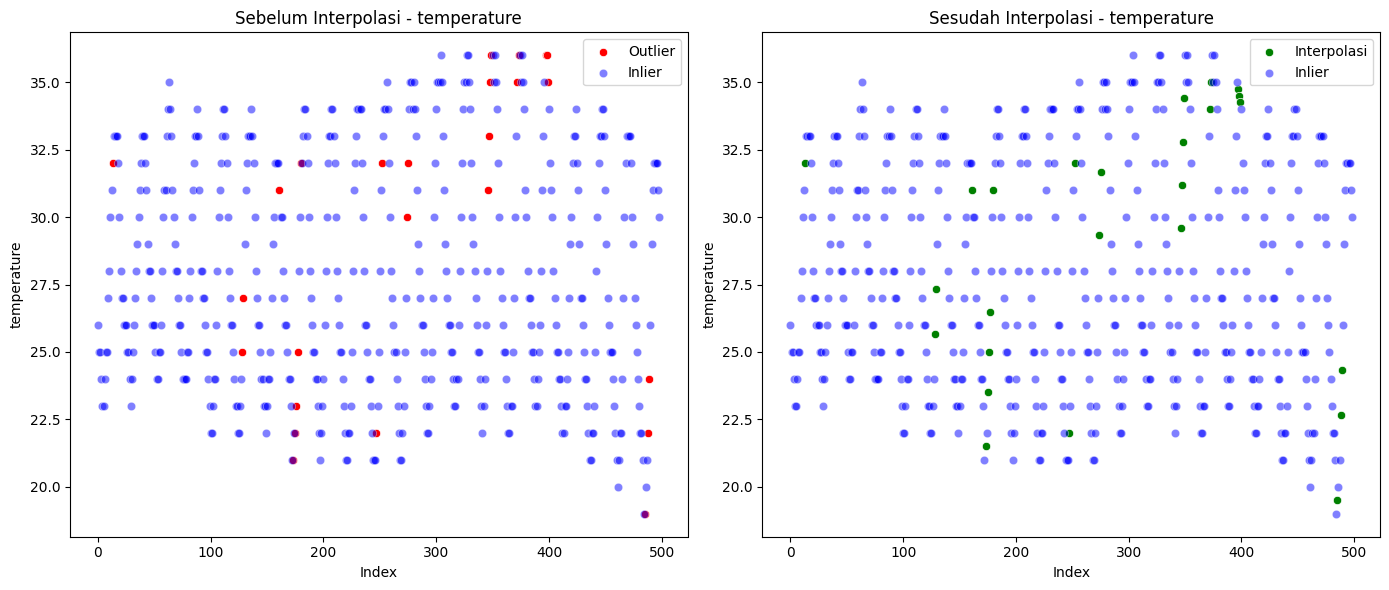

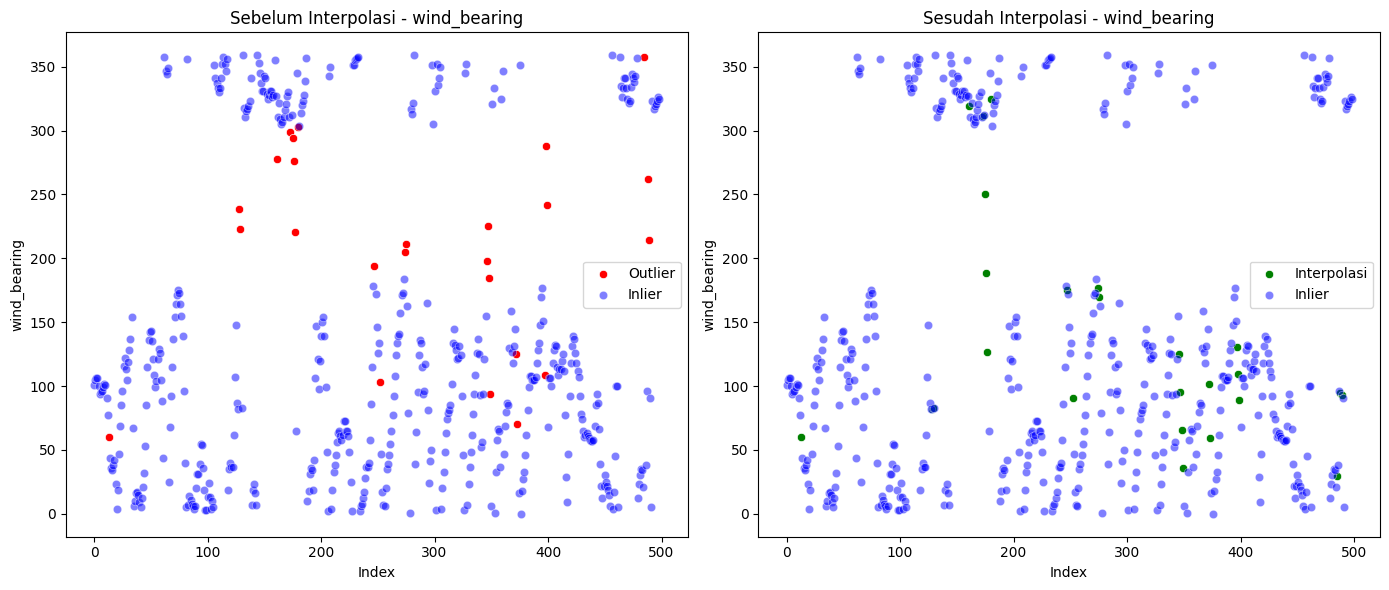

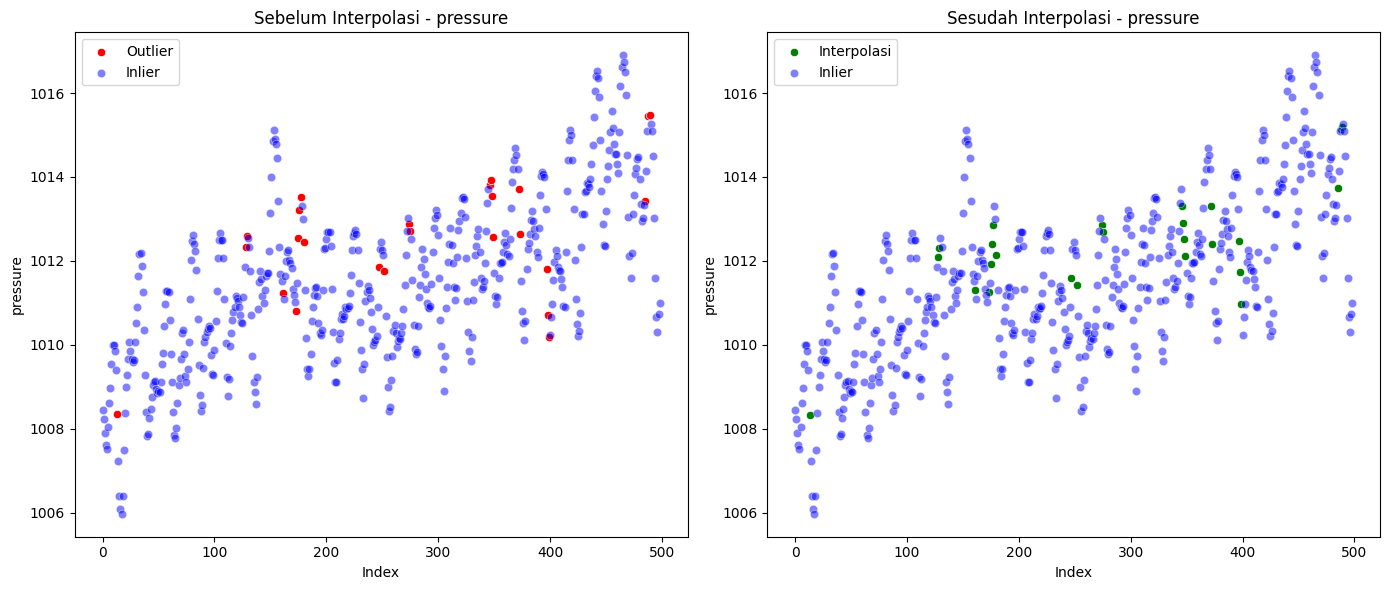

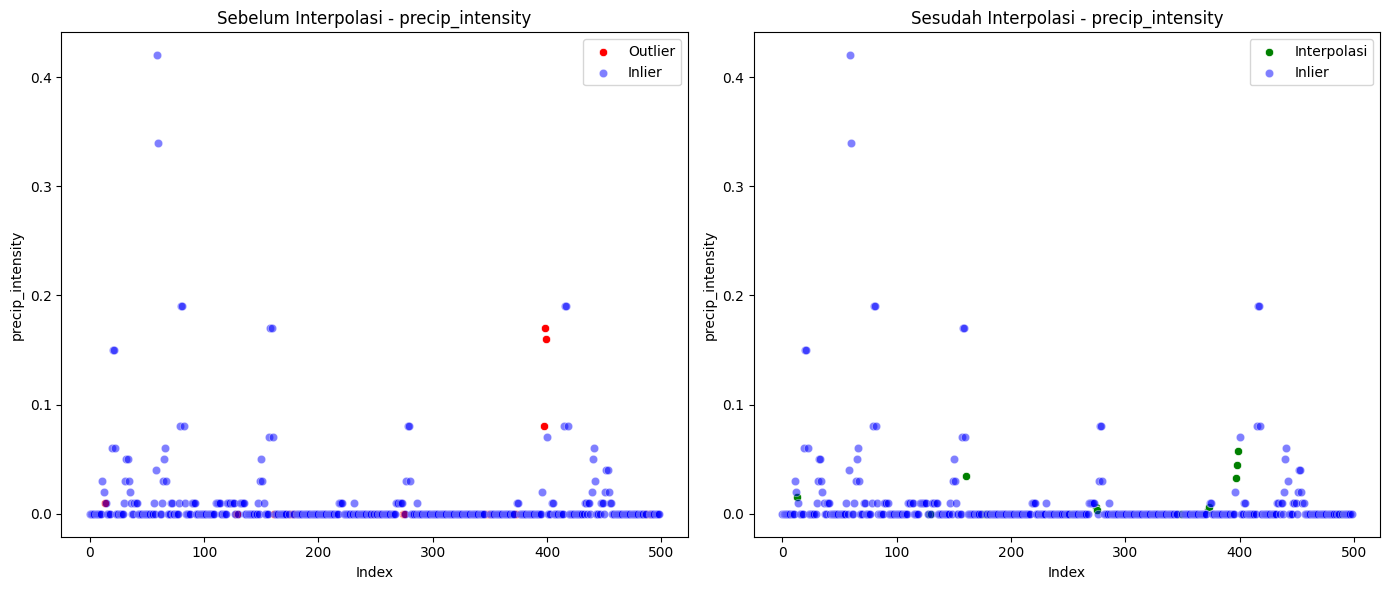

In [557]:

cols_to_plot = numerical_cols[::3] 

for col in cols_to_plot:
    plt.figure(figsize=(14,6))
    
    # Plot sebelum interpolasi
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=df_outliers.index, y=df_outliers[col], color='red', label='Outlier')
    sns.scatterplot(x=df_inliers.index, y=df_inliers[col], color='blue', alpha=0.5, label='Inlier')
    plt.title(f'Sebelum Interpolasi - {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    
    # Plot setelah interpolasi
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=df_main[df_main['Outlier'] == -1].index, y=df_main[df_main['Outlier'] == -1][col], color='green', label='Interpolasi')
    sns.scatterplot(x=df_inliers.index, y=df_inliers[col], color='blue', alpha=0.5, label='Inlier')
    plt.title(f'Sesudah Interpolasi - {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
    plt.legend()
    
    plt.tight_layout()
    plt.show()


## Seleksi Fitur

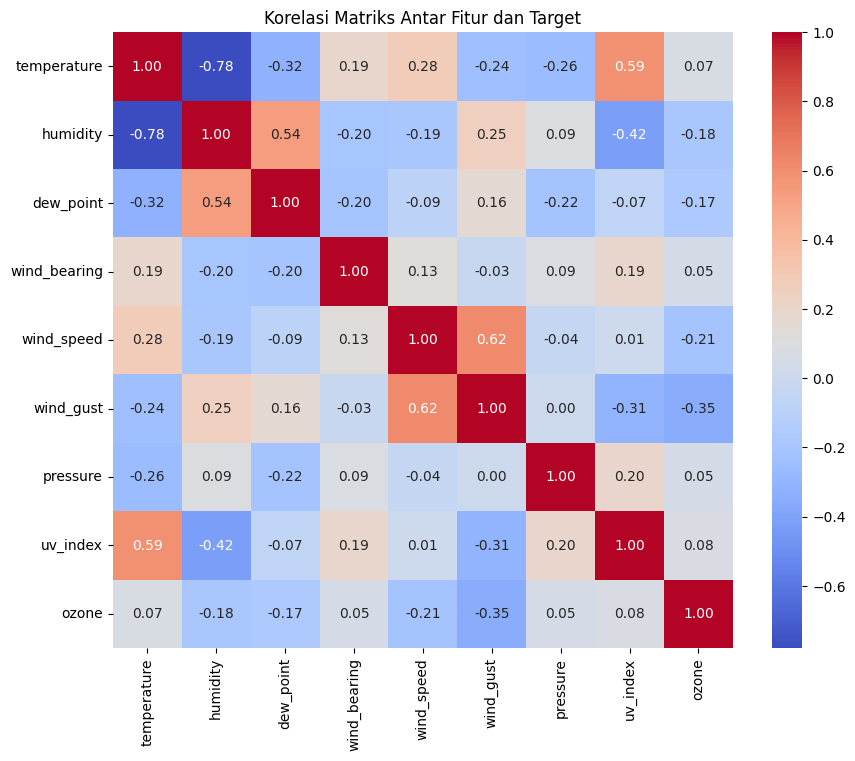

In [558]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title('Korelasi Matriks Antar Fitur dan Target')
plt.show()

disini fitur yang saya pilih :
- uv_index
- humidity

In [559]:
selected_df = df_main[['datetime_local', 'uv_index','humidity', 'temperature']]

### Menyiapkan Data untuk Recursive Multi-step Forecasting

Pada recursive forecasting, kita perlu:

Membuat data lag untuk setiap kolom yang digunakan sebagai input.
Input model adalah beberapa langkah sebelumnya dari setiap fitur yang dipilih.
Target model adalah satu langkah ke depan yang ingin diprediksi, tetapi untuk prediksi langkah berikutnya kita akan menggunakan output sebelumnya.


In [560]:
# Tampilkan DataFrame tanpa mengurutkan berdasarkan 'datetime_local'
print(selected_df)

       datetime_local  uv_index  humidity  temperature
0    01-10-2019 00:00       0.0       1.0         26.0
1    01-10-2019 01:00       0.0       1.0         25.0
2    01-10-2019 02:00       0.0       1.0         25.0
3    01-10-2019 03:00       0.0       1.0         24.0
4    01-10-2019 04:00       0.0       1.0         23.0
..                ...       ...       ...          ...
494  21-10-2019 14:00       5.0       0.0         32.0
495  21-10-2019 15:00       3.0       0.0         32.0
496  21-10-2019 16:00       1.0       0.0         32.0
497  21-10-2019 17:00       0.0       0.0         31.0
498  21-10-2019 18:00       0.0       0.0         30.0

[499 rows x 4 columns]


### Lag Fitur

In [561]:
n_lags = 10

for lag in range(1, n_lags + 1):
    selected_df[f'HM_lag_{lag}'] = selected_df['humidity'].shift(lag)
    selected_df[f'UI_lag_{lag}'] = selected_df['uv_index'].shift(lag)

for lag in range(1, n_lags + 1):
    selected_df[f'T_lag_{lag}'] = selected_df['temperature'].shift(lag)

selected_df.dropna(inplace=True)

selected_df

C:\Users\NikiR\AppData\Local\Temp\ipykernel_11984\4154143321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df[f'HM_lag_{lag}'] = selected_df['humidity'].shift(lag)
C:\Users\NikiR\AppData\Local\Temp\ipykernel_11984\4154143321.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df[f'UI_lag_{lag}'] = selected_df['uv_index'].shift(lag)
C:\Users\NikiR\AppData\Local\Temp\ipykernel_11984\4154143321.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

,datetime_local,uv_index,humidity,temperature,HM_lag_1,UI_lag_1,HM_lag_2,UI_lag_2,HM_lag_3,UI_lag_3,...,T_lag_1,T_lag_2,T_lag_3,T_lag_4,T_lag_5,T_lag_6,T_lag_7,T_lag_8,T_lag_9,T_lag_10
10,01-10-2019 10:00,4.0,1.0,28.0,1.0,3.0,1.0,1.0,1.0,0.0,...,27.0,25.0,25.0,24.0,23.000000,23.000000,24.000000,25.000000,25.000000,26.000000
11,01-10-2019 11:00,5.0,1.0,30.0,1.0,4.0,1.0,3.0,1.0,1.0,...,28.0,27.0,25.0,25.0,24.000000,23.000000,23.000000,24.000000,25.000000,25.000000
12,01-10-2019 12:00,6.0,1.0,31.0,1.0,5.0,1.0,4.0,1.0,3.0,...,30.0,28.0,27.0,25.0,25.000000,24.000000,23.000000,23.000000,24.000000,25.000000
13,01-10-2019 13:00,5.5,0.5,32.0,1.0,6.0,1.0,5.0,1.0,4.0,...,31.0,30.0,28.0,27.0,25.000000,25.000000,24.000000,23.000000,23.000000,24.000000
14,01-10-2019 14:00,5.0,0.0,33.0,0.5,5.5,1.0,6.0,1.0,5.0,...,32.0,31.0,30.0,28.0,27.000000,25.000000,25.000000,24.000000,23.000000,23.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,21-10-2019 14:00,5.0,0.0,32.0,0.0,7.0,0.0,7.0,0.0,6.0,...,32.0,31.0,29.0,26.0,24.333333,22.666667,21.000000,20.000000,19.500000,19.000000
495,21-10-2019 15:00,3.0,0.0,32.0,0.0,5.0,0.0,7.0,0.0,7.0,...,32.0,32.0,31.0,29.0,26.000000,24.333333,22.666667,21.000000,20.000000,19.500000
496,21-10-2019 16:00,1.0,0.0,32.0,0.0,3.0,0.0,5.0,0.0,7.0,...,32.0,32.0,32.0,31.0,29.000000,26.000000,24.333333,22.666667,21.000000,20.000000
497,21-10-2019 17:00,0.0,0.0,31.0,0.0,1.0,0.0,3.0,0.0,5.0,...,32.0,32.0,32.0,32.0,31.000000,29.000000,26.000000,24.333333,22.666667,21.000000


### Horizon / Target

Dalam kasus ini, kita ingin memprediksi temperature 3 jam kedepan, tetapi tetap melibatkan fitur lain seperti uv_index dan ozone.

temperature disini akan digunakan dalam model rekursif multistep forecasting sebagai kolom tujuan 1

In [562]:

selected_df['T_future_1'] = selected_df['temperature'].shift(-1)
selected_df['HM_future_1'] = selected_df['humidity'].shift(-1)
selected_df['UI_future_1'] = selected_df['uv_index']

selected_df.dropna(inplace=True)


feature_cols_hr = [f'T_lag_{lag}' for lag in range(1, 11)]
feature_cols_rr = [f'HM_lag_{lag}' for lag in range(1, 11)]
feature_cols_ecg = [f'UI_lag_{lag}' for lag in range(1, 11)]

feature_cols = feature_cols_rr + feature_cols_ecg + feature_cols_hr

X = selected_df[feature_cols]

y_hr = selected_df['T_future_1']
y_rr = selected_df['HM_future_1']    
y_ecg = selected_df['UI_future_1']   




In [563]:
selected_df

,datetime_local,uv_index,humidity,temperature,HM_lag_1,UI_lag_1,HM_lag_2,UI_lag_2,HM_lag_3,UI_lag_3,...,T_lag_4,T_lag_5,T_lag_6,T_lag_7,T_lag_8,T_lag_9,T_lag_10,T_future_1,HM_future_1,UI_future_1
10,01-10-2019 10:00,4.0,1.0,28.0,1.0,3.0,1.0,1.0,1.0,0.0,...,24.000000,23.000000,23.000000,24.000000,25.000000,25.000000,26.0,30.0,1.0,4.0
11,01-10-2019 11:00,5.0,1.0,30.0,1.0,4.0,1.0,3.0,1.0,1.0,...,25.000000,24.000000,23.000000,23.000000,24.000000,25.000000,25.0,31.0,1.0,5.0
12,01-10-2019 12:00,6.0,1.0,31.0,1.0,5.0,1.0,4.0,1.0,3.0,...,25.000000,25.000000,24.000000,23.000000,23.000000,24.000000,25.0,32.0,0.5,6.0
13,01-10-2019 13:00,5.5,0.5,32.0,1.0,6.0,1.0,5.0,1.0,4.0,...,27.000000,25.000000,25.000000,24.000000,23.000000,23.000000,24.0,33.0,0.0,5.5
14,01-10-2019 14:00,5.0,0.0,33.0,0.5,5.5,1.0,6.0,1.0,5.0,...,28.000000,27.000000,25.000000,25.000000,24.000000,23.000000,23.0,33.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
493,21-10-2019 13:00,7.0,0.0,32.0,0.0,7.0,0.0,6.0,0.0,4.0,...,24.333333,22.666667,21.000000,20.000000,19.500000,19.000000,21.0,32.0,0.0,7.0
494,21-10-2019 14:00,5.0,0.0,32.0,0.0,7.0,0.0,7.0,0.0,6.0,...,26.000000,24.333333,22.666667,21.000000,20.000000,19.500000,19.0,32.0,0.0,5.0
495,21-10-2019 15:00,3.0,0.0,32.0,0.0,5.0,0.0,7.0,0.0,7.0,...,29.000000,26.000000,24.333333,22.666667,21.000000,20.000000,19.5,32.0,0.0,3.0
496,21-10-2019 16:00,1.0,0.0,32.0,0.0,3.0,0.0,5.0,0.0,7.0,...,31.000000,29.000000,26.000000,24.333333,22.666667,21.000000,20.0,31.0,0.0,1.0


## Data Splitting

In [564]:

from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

In [565]:
# Pastikan target variabel sudah didefinisikan
y_t = selected_df['T_future_1']
y_hm = selected_df['HM_future_1']
y_ui = selected_df['UI_future_1']

# Tentukan proporsi pembagian
train_size = 0.8
split_index = int(len(selected_df) * train_size)

# Bagi data
X_train = X.iloc[:split_index]
X_test = X.iloc[split_index:]
y_train_t = y_t.iloc[:split_index]
y_test_t = y_t.iloc[split_index:]
y_train_hm = y_hm.iloc[:split_index]
y_test_hm = y_hm.iloc[split_index:]
y_train_ui = y_ui.iloc[:split_index]
y_test_ui = y_ui.iloc[split_index:]


In [566]:
# Inisialisasi scaler tunggal untuk semua fitur
scaler = MinMaxScaler()
scaler.fit(X_train)

# Transformasi data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [567]:
# Define feature indices for temperature, ozone, and uv_index
feature_indices = {
    'temperature': [feature_cols.index(f'T_lag_{lag}') for lag in range(1, 11)],
    'humidity': [feature_cols.index(f'HM_lag_{lag}') for lag in range(1, 11)],
    'uv_index': [feature_cols.index(f'UI_lag_{lag}') for lag in range(1, 11)]
}

# DATA MODELLING

In [568]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error

In [569]:
from sklearn.ensemble import RandomForestRegressor
import joblib

In [570]:
def mean_absolute_percentage_error_custom(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_indices = y_true != 0
    y_true = y_true[non_zero_indices]
    y_pred = y_pred[non_zero_indices]
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [571]:
# Update untuk feature_cols dan feature_indices
feature_cols = [f'T_lag_{lag}' for lag in range(1, 11)] + \
               [f'HM_lag_{lag}' for lag in range(1, 11)] + \
               [f'UI_lag_{lag}' for lag in range(1, 11)]

feature_indices = {
    'temperature': [feature_cols.index(f'T_lag_{lag}') for lag in range(1, 11)],
    'humidity': [feature_cols.index(f'HM_lag_{lag}') for lag in range(1, 11)],
    'uv_index': [feature_cols.index(f'UI_lag_{lag}') for lag in range(1, 11)]
}

# Modifikasi fungsi untuk memprediksi
def recursive_forecast_multi(model_temperature, model_humidity, model_uv_index, scaler, X_input, steps, feature_cols, n_lags=10, feature_indices=None):
    predictions_temperature = []
    predictions_humidity = []
    predictions_uv_index = []

    # Pastikan X_input dalam bentuk 1D
    if X_input.ndim == 2 and X_input.shape[1] == 1:
        X_input = X_input.flatten()
    elif X_input.ndim > 1:
        X_input = X_input.reshape(-1)

    # Buat DataFrame input
    input_df = pd.DataFrame([X_input], columns=feature_cols)

    for step in range(steps):
        # Skalasi seluruh fitur
        input_scaled = scaler.transform(input_df.values)

        # Pisahkan fitur untuk masing-masing model
        features_temperature = input_scaled[:, feature_indices['temperature']]
        features_humidity = input_scaled[:, feature_indices['humidity']]
        features_uv_index = input_scaled[:, feature_indices['uv_index']]

        # Prediksi untuk masing-masing model
        pred_temperature = model_temperature.predict(features_temperature)[0]
        pred_humidity = model_humidity.predict(features_humidity)[0]
        pred_uv_index = model_uv_index.predict(features_uv_index)[0]

        # Simpan prediksi
        predictions_temperature.append(pred_temperature)
        predictions_humidity.append(pred_humidity)
        predictions_uv_index.append(pred_uv_index)

        # Pembaruan fitur lag untuk iterasi berikutnya
        for lag in range(1, n_lags):
            input_df[f'T_lag_{lag}'] = input_df[f'T_lag_{lag + 1}']
            input_df[f'HM_lag_{lag}'] = input_df[f'HM_lag_{lag + 1}']
            input_df[f'UI_lag_{lag}'] = input_df[f'UI_lag_{lag + 1}']

        # Tambahkan prediksi terbaru ke lag terakhir
        input_df[f'T_lag_{n_lags}'] = pred_temperature
        input_df[f'HM_lag_{n_lags}'] = pred_humidity
        input_df[f'UI_lag_{n_lags}'] = pred_uv_index


    return predictions_temperature, predictions_humidity, predictions_uv_index

## 1. Random Forest Regressor

In [572]:
from sklearn.ensemble import RandomForestRegressor

# Model untuk masing-masing target
model_temperature = RandomForestRegressor(n_estimators=100, random_state=42)
model_humidty = RandomForestRegressor(n_estimators=100, random_state=42)
model_uv_index = RandomForestRegressor(n_estimators=100, random_state=42)

# Pastikan X_train_scaled sudah di-scaling dan sesuai dengan kolom fitur
# Fit model dengan data training untuk masing-masing target
model_temperature.fit(X_train_scaled[:, feature_indices['temperature']], y_train_t)
model_humidty.fit(X_train_scaled[:, feature_indices['humidity']], y_train_hm)
model_uv_index.fit(X_train_scaled[:, feature_indices['uv_index']], y_train_ui)

RandomForestRegressor(random_state=42)

In [573]:
from sklearn.metrics import mean_absolute_percentage_error

# Prediksi pada data test untuk HR
y_pred_single_t = model_temperature.predict(X_test_scaled[:, feature_indices['temperature']])
y_pred_single_t_rounded = np.round(y_pred_single_t).astype(int)

# Hitung MAPE untuk prediksi HR
mape_single_t = mean_absolute_percentage_error(y_test_t, y_pred_single_t_rounded)
print(f"MAPE (Single-step Prediction T): {mape_single_t:.2f}%")


MAPE (Single-step Prediction T): 0.07%


In [574]:
# Ambil data awal dari X_test_scaled untuk input pertama
X_initial = X_test_scaled[0].reshape(1, -1)

# Jumlah langkah prediksi
steps = 5

# Lakukan prediksi rekursif untuk HR, RR, dan ECGL
predictions_temperature, predictions_humidty, predictions_uv_index = recursive_forecast_multi(
    model_temperature=model_temperature,  # Model untuk prediksi temperatur
    model_humidity=model_humidty,       # Model untuk prediksi ozone
    model_uv_index=model_uv_index,   # Model untuk prediksi UV index
    scaler=scaler,
    X_input=X_initial,
    steps=steps,
    feature_cols=feature_cols,
    n_lags=10,
    feature_indices=feature_indices
)

# Ambil nilai aktual untuk perbandingan
actual_t_recursive = y_test_t.iloc[:steps].values

# Hitung MAPE untuk prediksi temperatur
mape_recursive_t = mean_absolute_percentage_error_custom(actual_t_recursive, predictions_temperature)
print(f"MAPE (Recursive Forecasting Temperature): {mape_recursive_t:.2f}%")


MAPE (Recursive Forecasting Temperature): 13.00%


c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fit

In [575]:
print("\nPerbandingan Actual vs Predicted T:")
for i in range(steps):
    print(f"Langkah {i+1}: Prediksi T = {predictions_temperature[i]} Suhu, Aktual T = {actual_t_recursive[i]} Suhu")


Perbandingan Actual vs Predicted T:
Langkah 1: Prediksi T = 31.988333098574966 Suhu, Aktual T = 32.0 Suhu
Langkah 2: Prediksi T = 33.03442922072843 Suhu, Aktual T = 31.0 Suhu
Langkah 3: Prediksi T = 33.72881071602547 Suhu, Aktual T = 30.0 Suhu
Langkah 4: Prediksi T = 33.84211632609456 Suhu, Aktual T = 28.0 Suhu
Langkah 5: Prediksi T = 33.77799409631046 Suhu, Aktual T = 27.0 Suhu


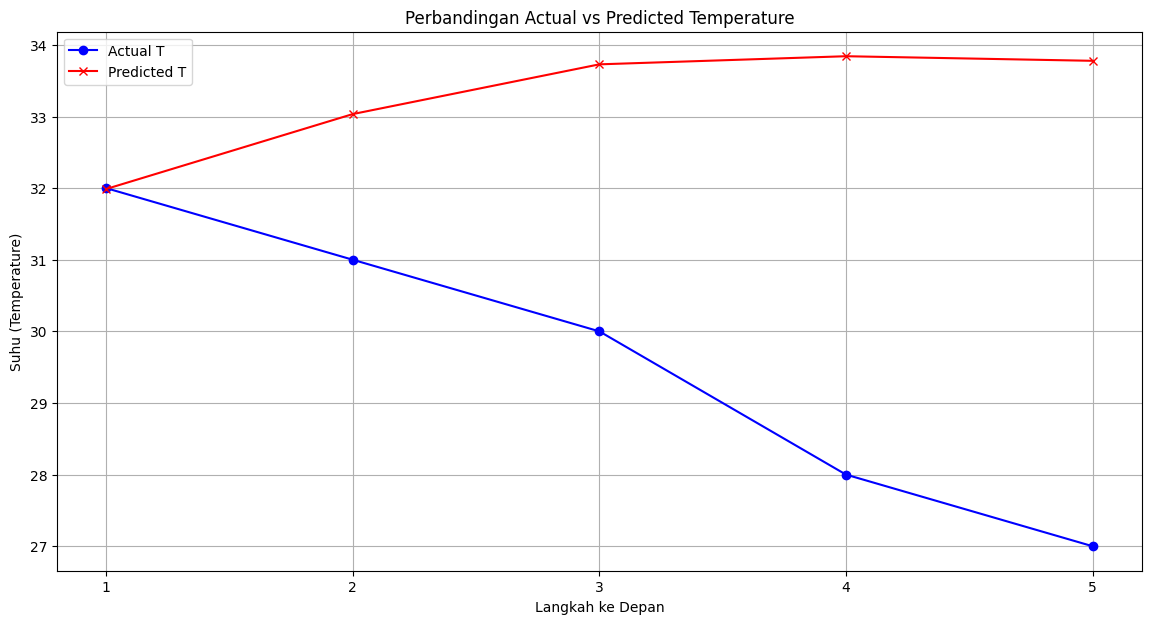

In [576]:
# Membuat range untuk langkah prediksi
steps_range = range(1, steps + 1)

# Membuat plot
plt.figure(figsize=(14, 7))
plt.plot(steps_range, actual_t_recursive, marker='o', label='Actual T', color='blue')
plt.plot(steps_range, predictions_temperature, marker='x', label='Predicted T', color='red')
plt.xlabel('Langkah ke Depan')
plt.ylabel('Suhu (Temperature)')
plt.title('Perbandingan Actual vs Predicted Temperature')
plt.legend()
plt.grid(True)
plt.xticks(steps_range)
plt.show()

## 2. SVR

In [577]:
from sklearn.svm import SVR

In [578]:
model_t_svr = SVR(kernel='rbf', C=50, gamma='auto', epsilon=0.2)
model_hm_svr = SVR(kernel='rbf', C=50, gamma='auto', epsilon=0.2)
model_ui_svr = SVR(kernel='rbf', C=50, gamma='auto', epsilon=0.2)

model_t_svr.fit(X_train_scaled[:, feature_indices['temperature']], y_train_t)

model_hm_svr.fit(X_train_scaled[:, feature_indices['humidity']], y_train_hm)

model_ui_svr.fit(X_train_scaled[:, feature_indices['uv_index']], y_train_ui)


SVR(C=50, epsilon=0.2, gamma='auto')

In [579]:
X_initial = X_test_scaled[0].reshape(1, -1)  # Input data awal
steps = 30  # Jumlah langkah ke depan


predictions_temperature_svr, predictions_humidty_svr, predictions_uv_index_svr = recursive_forecast_multi(
    model_temperature=model_temperature,  # Model untuk prediksi temperatur
    model_humidity=model_humidty,       # Model untuk prediksi ozone
    model_uv_index=model_uv_index,   # Model untuk prediksi UV index
    scaler=scaler,
    X_input=X_initial,
    steps=steps,
    feature_cols=feature_cols,
    n_lags=10,
    feature_indices=feature_indices
)


# Ambil nilai aktual untuk perbandingan
actual_t_recursive = y_test_t.iloc[:steps].values

# Hitung MAPE untuk `temperature`
mape_recursive_t_svr = mean_absolute_percentage_error(actual_t_recursive, predictions_temperature_svr)
print(f"MAPE (Recursive Forecasting Temperature SVR): {mape_recursive_t_svr:.2f}%")

MAPE (Recursive Forecasting Temperature SVR): 0.14%


c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\NikiR\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fit

In [580]:
print("\nPerbandingan Actual vs Predicted T (SVR):")
for i in range(steps):
    print(f"Langkah {i+1}: Prediksi T = {predictions_temperature_svr[i]} bpm, Aktual T = {actual_t_recursive[i]} Suhu")


Perbandingan Actual vs Predicted T (SVR):
Langkah 1: Prediksi T = 31.988333098574966 bpm, Aktual T = 32.0 Suhu
Langkah 2: Prediksi T = 33.03442922072843 bpm, Aktual T = 31.0 Suhu
Langkah 3: Prediksi T = 33.72881071602547 bpm, Aktual T = 30.0 Suhu
Langkah 4: Prediksi T = 33.84211632609456 bpm, Aktual T = 28.0 Suhu
Langkah 5: Prediksi T = 33.77799409631046 bpm, Aktual T = 27.0 Suhu
Langkah 6: Prediksi T = 33.33873450508901 bpm, Aktual T = 26.0 Suhu
Langkah 7: Prediksi T = 28.55306762534735 bpm, Aktual T = 25.0 Suhu
Langkah 8: Prediksi T = 28.55306762534735 bpm, Aktual T = 25.0 Suhu
Langkah 9: Prediksi T = 28.55306762534735 bpm, Aktual T = 24.0 Suhu
Langkah 10: Prediksi T = 28.55306762534735 bpm, Aktual T = 24.0 Suhu
Langkah 11: Prediksi T = 28.55306762534735 bpm, Aktual T = 23.0 Suhu
Langkah 12: Prediksi T = 28.55306762534735 bpm, Aktual T = 22.0 Suhu
Langkah 13: Prediksi T = 28.55306762534735 bpm, Aktual T = 22.0 Suhu
Langkah 14: Prediksi T = 28.55306762534735 bpm, Aktual T = 23.0 Suhu

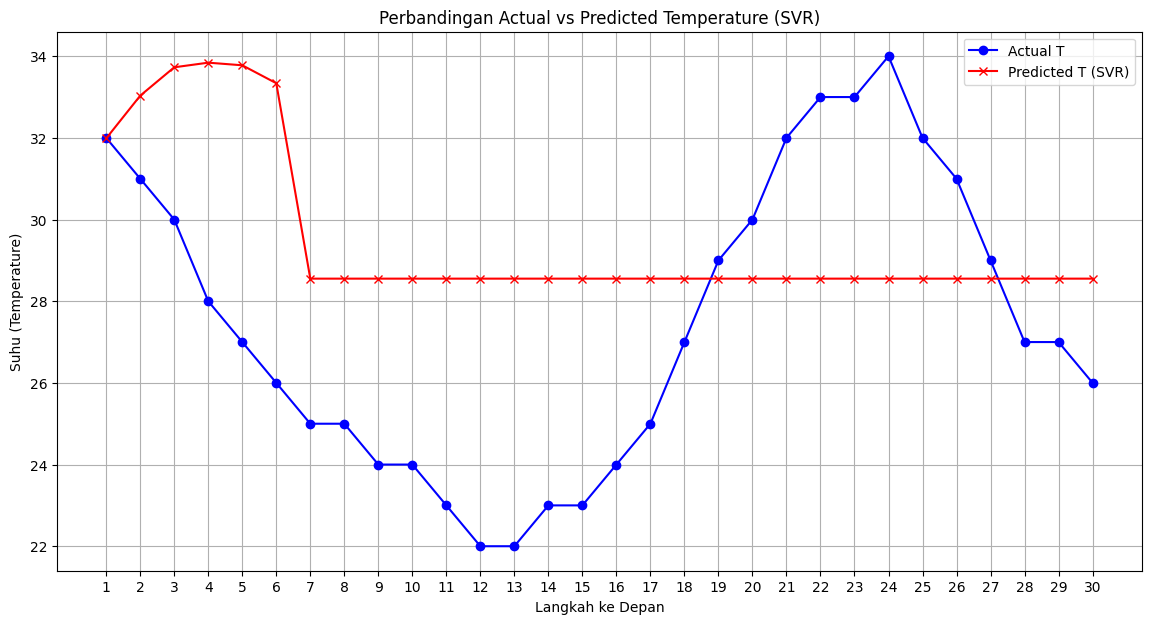

In [581]:
# Membuat range untuk langkah prediksi
steps_range = range(1, steps + 1)

# Membuat plot
plt.figure(figsize=(14, 7))
plt.plot(steps_range, actual_t_recursive, marker='o', label='Actual T', color='blue')
plt.plot(steps_range, predictions_temperature_svr, marker='x', label='Predicted T (SVR)', color='red')
plt.xlabel('Langkah ke Depan')
plt.ylabel('Suhu (Temperature)')
plt.title('Perbandingan Actual vs Predicted Temperature (SVR)')
plt.legend()
plt.grid(True)
plt.xticks(steps_range)
plt.show()


# KESIMPULAN

- Hasil MAPE Random Forest Regressor: 0.07%
- Hasil MAPE SVR: 0.14%

jadi model terbaik untuk menenyatakan persentase kesalahan paling kecil Random Forest Regressor

# DEPLOYMENT

In [582]:
import joblib

# WEBSTITE HASIL

https://huggingface.co/spaces/NikiRaihan/PSDDataCuacaHarianIndonesia